In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset ===
with open("CodeQA_Part1.csv", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Step 2: Classify question types ===
def classify_question_type(q):
    q_lower = q.lower()
    if q_lower.startswith("what"):
        return "What"
    elif q_lower.startswith("how"):
        return "How"
    elif q_lower.startswith("where"):
        return "Where"
    elif q_lower.startswith("when"):
        return "When"
    elif q_lower.startswith("why"):
        return "Why"
    elif q_lower.startswith("for what purpose"):
        return "For what purpose"
    elif q_lower.startswith(("does", "do", "is", "are", "can")):
        return "Yes/No"
    else:
        return "Other"

df["question_type"] = df["question"].apply(classify_question_type)

# === Step 3: Extract score values from nested structure ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]
for metric in metrics:
    df[metric] = df[metric].apply(lambda x: x.get("score") if isinstance(x, dict) else None)

# === Step 4: Generate plots for each question type ===
def visualize_scores(flat_records, title):
    df_scores = pd.DataFrame(flat_records)
    grouped = df_scores.groupby("metric")["score"]
    avg_scores = grouped.mean()
    std_scores = grouped.std().fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_scores.index,
        avg_scores.values,
        yerr=std_scores.values,
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for qtype, subset in df.groupby("question_type"):
    flat_records = []
    for metric in metrics:
        for score in subset[metric].dropna():
            flat_records.append({"metric": metric, "score": score})
    if flat_records:
        visualize_scores(flat_records, title=f"Average Scores for '{qtype}' Questions")

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for metric in metrics:
        mean_val = subset[metric].mean()
        std_val = subset[metric].std()
        if pd.notna(mean_val) and pd.notna(std_val):
            row[metric.capitalize()] = f"{mean_val:.2f} ({std_val:.2f})"
        elif pd.notna(mean_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (0.00)"
        else:
            row[metric.capitalize()] = "N/A"
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df = summary_df[["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]]
summary_df = summary_df.round(2)

# === Display the table ===
from IPython.display import display
display(summary_df)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 1337175: character maps to <undefined>

✓ Loaded with comma separator

Dataset shape: 18695 rows × 9 columns
Columns: ['id', 'code', 'question', 'answer', 'prediction', 'accuracy', 'completeness', 'relevance', 'clarity']


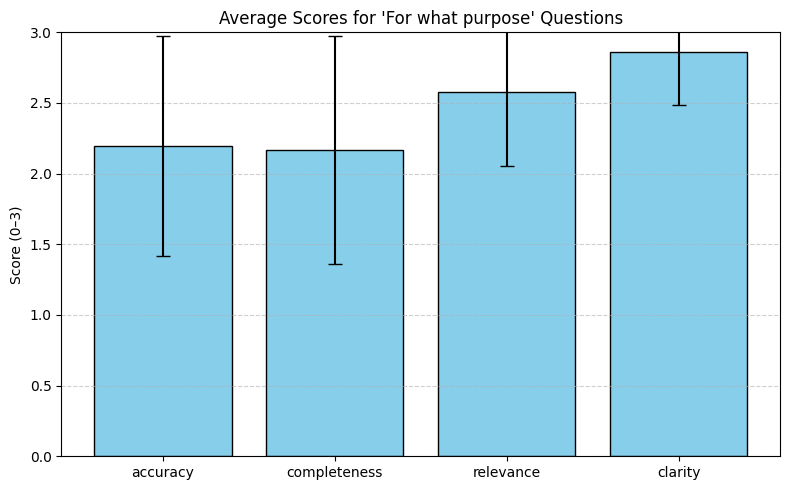

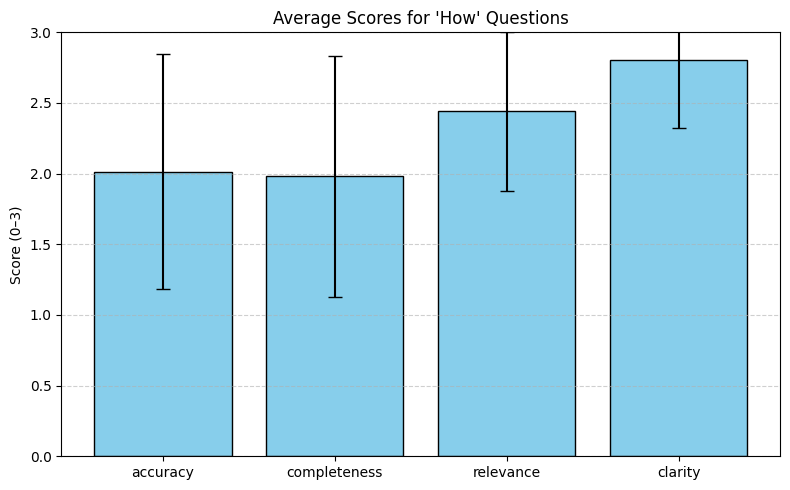

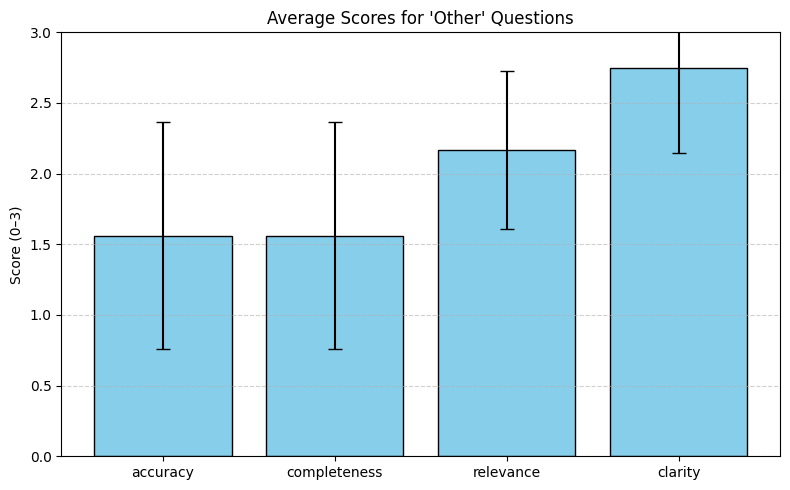

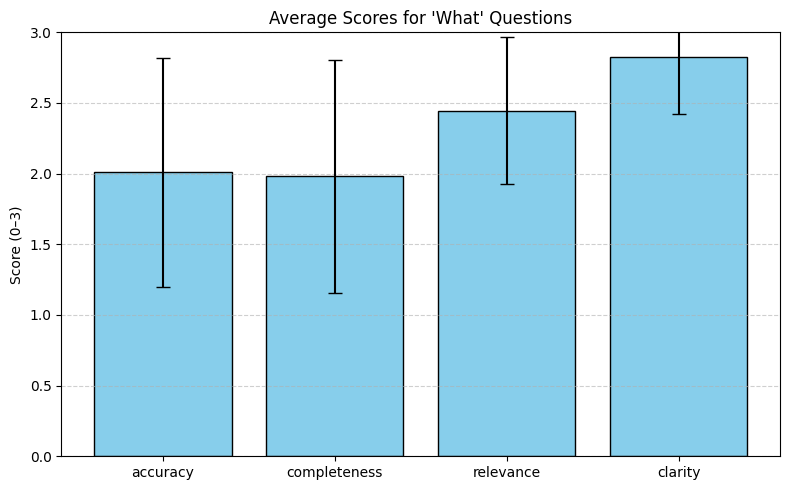

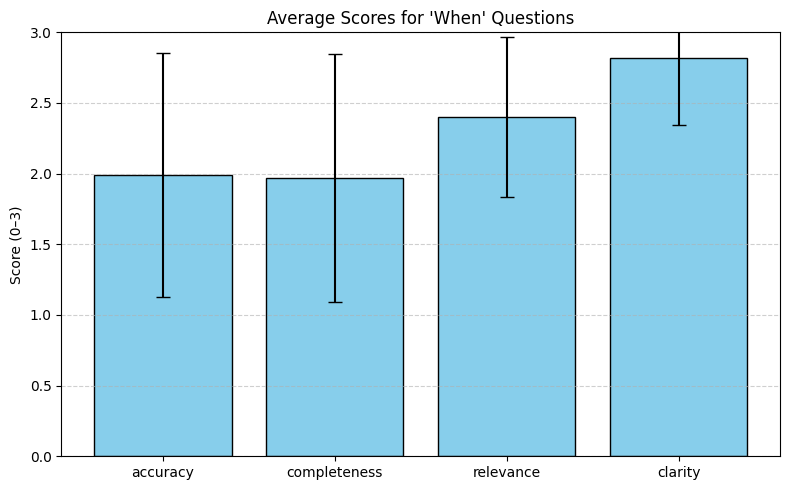

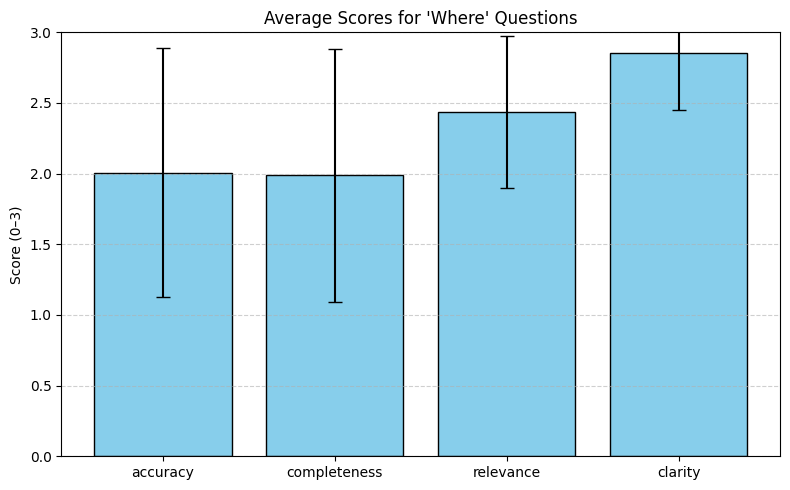

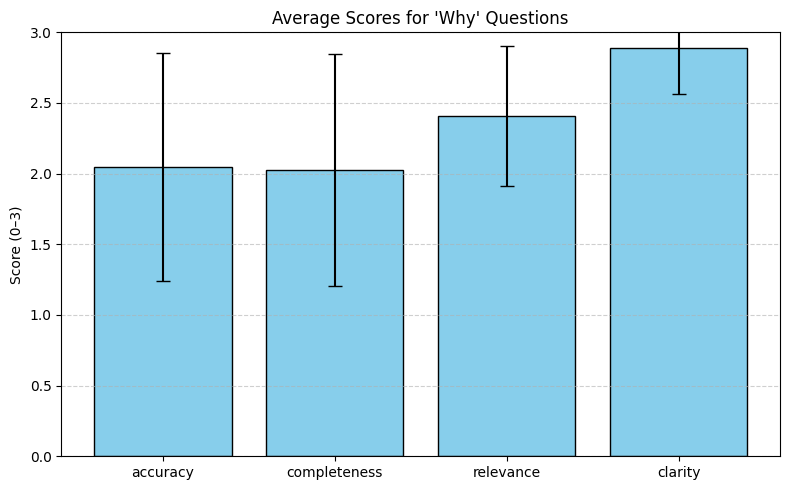

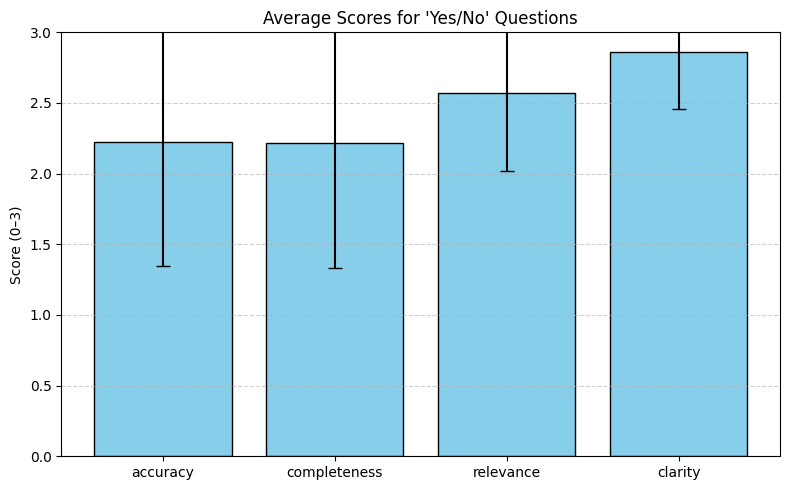


=== Summary Statistics by Question Type ===
   Question Type  Count     Accuracy Completeness    Relevance      Clarity
For what purpose    744 2.20 (±0.78) 2.17 (±0.81) 2.58 (±0.52) 2.86 (±0.38)
             How   2035 2.01 (±0.83) 1.98 (±0.85) 2.44 (±0.56) 2.80 (±0.48)
           Other    342 1.56 (±0.80) 1.56 (±0.80) 2.17 (±0.56) 2.75 (±0.60)
            What  13368 2.01 (±0.81) 1.98 (±0.82) 2.45 (±0.52) 2.83 (±0.41)
            When    878 1.99 (±0.86) 1.97 (±0.88) 2.40 (±0.57) 2.82 (±0.47)
           Where   1116 2.01 (±0.88) 1.99 (±0.89) 2.44 (±0.54) 2.86 (±0.41)
             Why     44 2.05 (±0.81) 2.02 (±0.82) 2.41 (±0.50) 2.89 (±0.32)
          Yes/No    168 2.23 (±0.88) 2.22 (±0.89) 2.57 (±0.55) 2.86 (±0.41)

Summary saved to 'question_type_summary.csv'


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset ===
# Try different methods to load the file
import os

# Check if file exists
if not os.path.exists("CodeQA_Part1.csv"):
    raise FileNotFoundError("CodeQA_Part1.csv not found in current directory")

# Try multiple loading strategies
loaded = False
errors = []

# Strategy 1: Tab-separated
try:
    df = pd.read_csv("CodeQA_Part1.csv", sep='\t', encoding='utf-8')
    if 'question' in df.columns:
        print("✓ Loaded with tab separator (UTF-8)")
        loaded = True
except Exception as e:
    errors.append(f"Tab/UTF-8: {str(e)}")

# Strategy 2: Tab-separated with different encoding
if not loaded:
    try:
        df = pd.read_csv("CodeQA_Part1.csv", sep='\t', encoding='latin-1')
        if 'question' in df.columns:
            print("✓ Loaded with tab separator (Latin-1)")
            loaded = True
    except Exception as e:
        errors.append(f"Tab/Latin-1: {str(e)}")

# Strategy 3: Comma-separated
if not loaded:
    try:
        df = pd.read_csv("CodeQA_Part1.csv", encoding='utf-8')
        if 'question' in df.columns:
            print("✓ Loaded with comma separator")
            loaded = True
    except Exception as e:
        errors.append(f"Comma: {str(e)}")

# Strategy 4: Auto-detect separator
if not loaded:
    try:
        df = pd.read_csv("CodeQA_Part1.csv", sep=None, engine='python', encoding='utf-8')
        if 'question' in df.columns:
            print("✓ Loaded with auto-detected separator")
            loaded = True
    except Exception as e:
        errors.append(f"Auto-detect: {str(e)}")

# If still not loaded, show diagnostics
if not loaded:
    print("Failed to load file properly. Attempting to show what was loaded:")
    print("\nErrors encountered:")
    for err in errors:
        print(f"  - {err}")
    
    # Load anyway and show what we got
    df = pd.read_csv("CodeQA_Part1.csv", sep='\t', encoding='utf-8')
    print("\nLoaded columns:", df.columns.tolist())
    print("\nFirst row:")
    print(df.iloc[0])
    print("\nPlease check if the column names match. Looking for: 'question', 'accuracy', 'completeness', 'relevance', 'clarity'")
    
# Display dataset info
print(f"\nDataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Columns: {df.columns.tolist()}")

# === Step 2: Classify question types ===
def classify_question_type(q):
    q_lower = q.lower()
    if q_lower.startswith("what"):
        return "What"
    elif q_lower.startswith("how"):
        return "How"
    elif q_lower.startswith("where"):
        return "Where"
    elif q_lower.startswith("when"):
        return "When"
    elif q_lower.startswith("why"):
        return "Why"
    elif q_lower.startswith("for what purpose"):
        return "For what purpose"
    elif q_lower.startswith(("does", "do", "is", "are", "can", "did", "till")):
        return "Yes/No"
    else:
        return "Other"

df["question_type"] = df["question"].apply(classify_question_type)

# === Step 3: Ensure score columns are numeric ===
# Your CSV already has scores as numbers, so just convert to numeric
metrics = ["accuracy", "completeness", "relevance", "clarity"]
for metric in metrics:
    df[metric] = pd.to_numeric(df[metric], errors='coerce')

# === Step 4: Generate plots for each question type ===
def visualize_scores(subset, qtype, metrics):
    avg_scores = []
    std_scores = []
    
    for metric in metrics:
        avg_scores.append(subset[metric].mean())
        std_scores.append(subset[metric].std())
    
    plt.figure(figsize=(8, 5))
    plt.bar(
        metrics,
        avg_scores,
        yerr=std_scores,
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    plt.title(f"Average Scores for '{qtype}' Questions")
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Generate plots for each question type
for qtype, subset in df.groupby("question_type"):
    if len(subset) > 0:
        visualize_scores(subset, qtype, metrics)

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype, "Count": len(subset)}
    for metric in metrics:
        mean_val = subset[metric].mean()
        std_val = subset[metric].std()
        if pd.notna(mean_val) and pd.notna(std_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (±{std_val:.2f})"
        elif pd.notna(mean_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (±0.00)"
        else:
            row[metric.capitalize()] = "N/A"
    summary.append(row)

summary_df = pd.DataFrame(summary)

# Reorder columns for better presentation
column_order = ["Question Type", "Count", "Accuracy", "Completeness", "Relevance", "Clarity"]
summary_df = summary_df[column_order]

# === Display the table ===
print("\n=== Summary Statistics by Question Type ===")
print(summary_df.to_string(index=False))

# Optional: Save to CSV
summary_df.to_csv("question_type_summary.csv", index=False)
print("\nSummary saved to 'question_type_summary.csv'")